In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

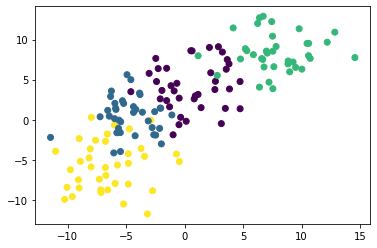

In [2]:
blobs = make_blobs(n_samples=150, n_features=2, centers=4, cluster_std=2.5, random_state=3)
X = blobs[0]
y = blobs[1]
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

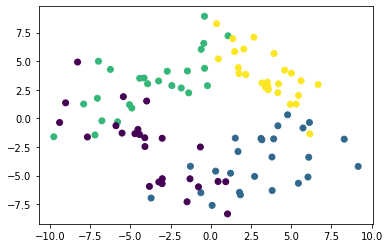

In [3]:
data = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0,n_repeated=0,n_classes=4,class_sep=1.2,n_clusters_per_class=1,scale =3)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
def plot(X, y,Xt,yt, model):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Failed to load")
    reduced_data = X[:, :2]

    h = .02        
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 4, X[:, 0].max() + 4
    y_min, y_max = X[:, 1].min() - 4, X[:, 1].max() + 4
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(1) 
    plt.title("Zbiór uczący",fontsize=15)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Dokładność: " + str(model.score(X,y)),fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.figure(2) 
    plt.title("Zbiór testowy",fontsize=15)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, alpha=0.8)
    plt.xlabel("Dokładność: " + str(model.score(Xt,yt)),fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
   
    return plt

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
layers = (100)

In [11]:
model = MLPClassifier(hidden_layer_sizes = layers, activation = 'tanh', solver = 'adam', max_iter = 1000,tol=0.0001,n_iter_no_change = 50, verbose = True)

In [12]:
model.fit(X_train, Y_train)

Iteration 1, loss = 1.03035165
Iteration 2, loss = 0.98293912
Iteration 3, loss = 0.93824007
Iteration 4, loss = 0.89625667
Iteration 5, loss = 0.85697093
Iteration 6, loss = 0.82034877
Iteration 7, loss = 0.78634108
Iteration 8, loss = 0.75488212
Iteration 9, loss = 0.72588874
Iteration 10, loss = 0.69926053
Iteration 11, loss = 0.67488049
Iteration 12, loss = 0.65261673
Iteration 13, loss = 0.63232564
Iteration 14, loss = 0.61385626
Iteration 15, loss = 0.59705474
Iteration 16, loss = 0.58176807
Iteration 17, loss = 0.56784740
Iteration 18, loss = 0.55515091
Iteration 19, loss = 0.54354619
Iteration 20, loss = 0.53291203
Iteration 21, loss = 0.52313949
Iteration 22, loss = 0.51413226
Iteration 23, loss = 0.50580651
Iteration 24, loss = 0.49809011
Iteration 25, loss = 0.49092166
Iteration 26, loss = 0.48424915
Iteration 27, loss = 0.47802854
Iteration 28, loss = 0.47222242
Iteration 29, loss = 0.46679859
Iteration 30, loss = 0.46172888
Iteration 31, loss = 0.45698812
Iteration 32, los

Iteration 275, loss = 0.30548335
Iteration 276, loss = 0.30532507
Iteration 277, loss = 0.30516749
Iteration 278, loss = 0.30501061
Iteration 279, loss = 0.30485441
Iteration 280, loss = 0.30469890
Iteration 281, loss = 0.30454407
Iteration 282, loss = 0.30438992
Iteration 283, loss = 0.30423643
Iteration 284, loss = 0.30408360
Iteration 285, loss = 0.30393143
Iteration 286, loss = 0.30377991
Iteration 287, loss = 0.30362904
Iteration 288, loss = 0.30347881
Iteration 289, loss = 0.30332922
Iteration 290, loss = 0.30318026
Iteration 291, loss = 0.30303192
Iteration 292, loss = 0.30288421
Iteration 293, loss = 0.30273711
Iteration 294, loss = 0.30259062
Iteration 295, loss = 0.30244474
Iteration 296, loss = 0.30229947
Iteration 297, loss = 0.30215479
Iteration 298, loss = 0.30201070
Iteration 299, loss = 0.30186721
Iteration 300, loss = 0.30172430
Iteration 301, loss = 0.30158196
Iteration 302, loss = 0.30144021
Iteration 303, loss = 0.30129902
Iteration 304, loss = 0.30115840
Iteration 

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
              n_iter_no_change=50, verbose=True)

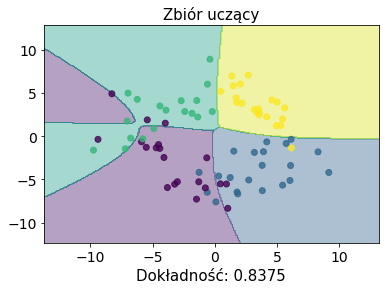

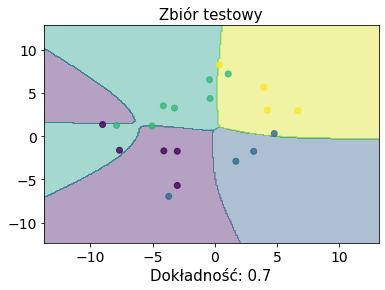

In [13]:
plot(X_train, Y_train,X_test,Y_test,model)
plt.show()